In [26]:
import pandas as pd
import pathlib as Path
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Part one - Prepare the Data

In [3]:
#Import the data
#Read the 'myopia.csv' file into pandas
test_file = os.path.join("Resources/myopia.csv")
myo_df = pd.read_csv(test_file)
myo_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [29]:
myo_df.shape

(618, 15)

In [31]:
#Remove the "MYOPIC" column from the dataset
myo_df['MYOPIC'].nunique()

2

In [5]:
myo_df_drop = myo_df.drop(['MYOPIC'], axis = 1)
myo_df_drop.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [33]:
#Create label for graphs later
labels = myo_df['MYOPIC']
labels.value_counts().nunique()

2

In [8]:
#Standardize your dataset so that columns that contain larger values 
#do not influence the outcome more than columns with smaller values.

#Checking the data for any invalid fields
myo_df_drop.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [9]:
myo_df_drop.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [14]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
myo_scaled = scaler.fit_transform(myo_df_drop)

In [15]:
myo_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

# Part 2: Apply Dimensionality Reduction

In [13]:
#Perform dimensionality reduction with PCA. How did the number of the features change?
#...For this assignment, preserve 90% of the explained variance in dimensionality reduction.

#Initialize PCA model

pca = PCA(n_components = 0.9)

In [17]:
#Get principal components for 'myo_scaled' data
myo_pca = pca.fit_transform(myo_scaled)

In [18]:
#Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [19]:
pca.explained_variance_ratio_.sum() 

0.9187361702915186

In [21]:
myo_pca.shape

(618, 10)

In [ ]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
#To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

#Initialize t-SNE model

tsne = TSNE(learning_rate = 250)

In [23]:
tsne_features = tsne.fit_transform(myo_pca)

C:\Users\jadou\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [24]:
tsne_features.shape

(618, 2)

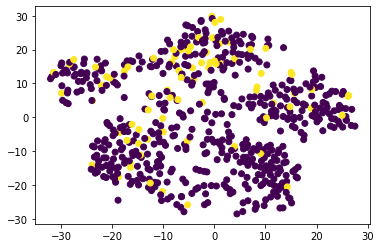

In [34]:
#Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [35]:
#Initialize K-means model 
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans

In [ ]:
#Create an elbow plot to identify the best number of clusters. Make sure to do the following:
  
  #If possible, determine where the elbow of the plot is, and at which value of k it appears

In [36]:
#Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(myo_pca)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\jadou\anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


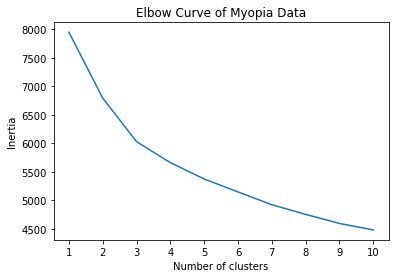

In [37]:
#Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve of Myopia Data')
plt.show()